In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
from google.colab import files
files.upload()

Saving homework.csv to homework.csv


{'homework.csv': b'rownames,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea\n1,42000,5850,3,1,2,yes,no,yes,no,no,1,no\n2,38500,4000,2,1,1,yes,no,no,no,no,0,no\n3,49500,3060,3,1,1,yes,no,no,no,no,0,no\n4,60500,6650,3,1,2,yes,yes,no,no,no,0,no\n5,61000,6360,2,1,1,yes,no,no,no,no,0,no\n6,66000,4160,3,1,1,yes,yes,yes,no,yes,0,no\n7,66000,3880,3,2,2,yes,no,yes,no,no,2,no\n8,69000,4160,3,1,3,yes,no,no,no,no,0,no\n9,83800,4800,3,1,1,yes,yes,yes,no,no,0,no\n10,88500,5500,3,2,4,yes,yes,no,no,yes,1,no\n11,90000,7200,3,2,1,yes,no,yes,no,yes,3,no\n12,30500,3000,2,1,1,no,no,no,no,no,0,no\n13,27000,1700,3,1,2,yes,no,no,no,no,0,no\n14,36000,2880,3,1,1,no,no,no,no,no,0,no\n15,37000,3600,2,1,1,yes,no,no,no,no,0,no\n16,37900,3185,2,1,1,yes,no,no,no,yes,0,no\n17,40500,3300,3,1,2,no,no,no,no,no,1,no\n18,40750,5200,4,1,3,yes,no,no,no,no,0,no\n19,45000,3450,1,1,1,yes,no,no,no,no,0,no\n20,45000,3986,2,2,1,no,yes,yes,no,no,1,no\n21,48500,4785,3,1,2,yes,yes,yes,no

In [5]:
df = pd.read_csv("homework.csv")

# Afficher les premières lignes
df.head()

,rownames,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000,6360,2,1,1,yes,no,no,no,no,0,no


In [6]:
binary_cols = [
    'driveway', 'recroom', 'fullbase',
    'gashw', 'airco', 'prefarea'
]

for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [7]:
df = df.drop(columns=['rownames'])

In [8]:
# Variable explicative et cible
X = df[['lotsize']]   # doit être 2D
y = df['price']

# Séparation train / test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modèle
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

# Prédiction
y_pred = model_simple.predict(X_test)

# Évaluation
print("=== Simple Linear Regression (lotsize -> price) ===")
print("Coefficient:", model_simple.coef_[0])
print("Intercept:", model_simple.intercept_)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

=== Simple Linear Regression (lotsize -> price) ===
Coefficient: 6.885408879999409
Intercept: 33003.36216890106
MSE: 543921224.559349
R²: 0.18583856088525563


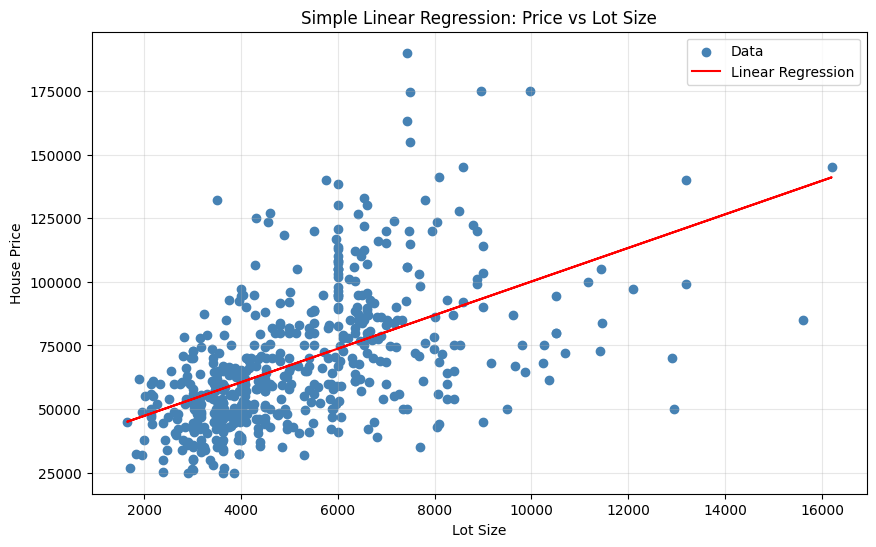

In [44]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Variables
X = df[['lotsize']]
y = df['price']

# Modèle
model_simple = LinearRegression()
model_simple.fit(X, y)

# Prédiction
y_pred = model_simple.predict(X)

plt.figure(figsize=(10,6))
plt.scatter(X, y, color='steelblue', label='Data')
plt.plot(X, y_pred, color='red', label='Linear Regression')
plt.xlabel("Lot Size")
plt.ylabel("House Price")
plt.title("Simple Linear Regression: Price vs Lot Size")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [9]:
# Variables explicatives (toutes sauf price)
X = df.drop(columns=['price'])
y = df['price']

# Train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modèle
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

# Prédiction
y_pred = model_multi.predict(X_test)

# Évaluation
print("=== Multiple Linear Regression (all features -> price) ===")
print("Intercept:", model_multi.intercept_)
print("Coefficients:")
for col, coef in zip(X.columns, model_multi.coef_):
    print(f"{col}: {coef}")

print("\nMSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

=== Multiple Linear Regression (all features -> price) ===
Intercept: -2513.002578839005
Coefficients:
lotsize: 3.6539897843068663
bedrooms: 955.8650444535124
bathrms: 13582.240421208591
stories: 7204.649075856236
driveway: 6940.012357095258
recroom: 4556.744351496631
fullbase: 6377.023265947158
gashw: 15128.960471897515
airco: 12674.616347273415
garagepl: 4611.647953847234
prefarea: 7815.193891613415

MSE: 256524986.5198622
R²: 0.6160238969106218


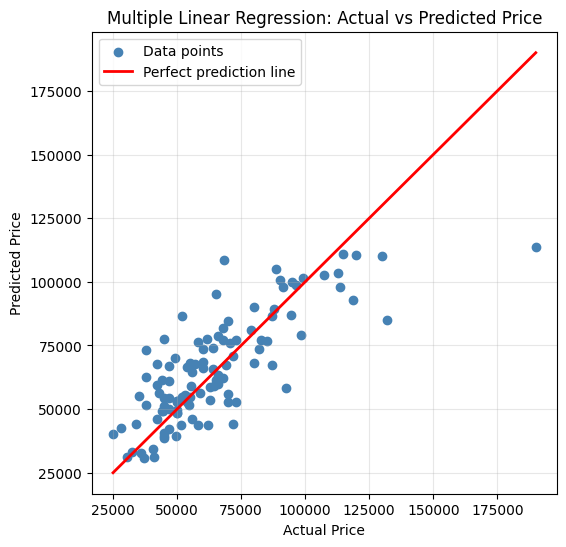

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Variables
X = df.drop(columns=['price'])
y = df['price']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Modèle multiple
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

# Prédiction
y_pred_multi = model_multi.predict(X_test)

# Plot
plt.figure(figsize=(6,6))
# Points de données
plt.scatter(y_test, y_pred_multi, color='steelblue', label='Data points')
# Ligne de référence
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2, label='Perfect prediction line')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Multiple Linear Regression: Actual vs Predicted Price")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()